# The Unicorn Particle Project

Today we are going to think about seed stage investing as science using ideas for physics and data science to work through a thought experiment. 

Our thought experiment overview:
- The elusive 'Unicorn Particle' is known to exist but is extremely rare: we'll say it's base rate is 1/100000.
- The value of being the first to discover an instance of the unicorn particle and incubate it with the appropriate equipment is 1000, and the cost of incubating is 10.
- The unicorn particle is so valuable because it contains latent potential to create massive amounts of value. While this value is part of its definition it is incredibly difficult to detect directly
- To detect the Unicorn particle teams of investment physicists build all manner of detection equipment aimed at capturing signals that indicate an particular particle might actually be a unicorn particle in disguise.
- These investment labs could examine every possible particle but rather use sourcing mechanisms to decide which particles to run experiments on. Our scientists happen to have data and know some machine learning and it helps them start with a smaller pool of particles to inspect with a better base rate of 1/100.
- Unfortunately, even with this better base rate we only have bandwidth to incubate 25 particles in hopes of unleashing massive value and proving our chosen particle was a unicorn particle. 
- So our scientists put their instruments to work studying these 500 curated particles to determine which will be the 25 to incubate. This experiment builds out the relationship between the prediction 'lift' for identifying these rare events, translates in to ROI for our investment scientists.

pardon me while I import some mathemagic.
![title](https://imgs.xkcd.com/comics/python.png)
image credit Randall Monroe, XKCD
https://xkcd.com/353/

In [8]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Step 1: Base Rates, Costs and Values

In [5]:
incubation_cost = 10
unicorn_value = incubation_cost*10**3 #(1 Thousand times the incubation cost)
base_rate = 10**(-5) #(1 in 100 Thousand)
incubation_limit = 25

That was simple enough, but lets see what happens if our scientists randomly select which particles to incubate. We'll run the experiment 1 million times and look out how our team could fair.

In [51]:
N = 1000000 #experiments
K = 25 #particles incubated

#Python purists beware:
#I'm using loops here for expository purposes
unicorns_found_randomly = np.zeros((N,))
for n in range(N):
    is_unicorn = np.zeros((K,)) #initialized as zero but changed to 1 based on outcome
    for i in range(K):
        #checkout come based on coin random outcome accordint to base rate
        is_unicorn[i] = int(np.random.random()<base_rate)
    
    unicorns_found_randomly[n] = sum(is_unicorn)

In [52]:
#organize the data
random_df = pd.DataFrame()
random_df['unicorns_found_randomly']=unicorns_found_randomly
random_df['incubation_costs'] = incubation_cost*K
random_df['unicorn_returns'] = unicorns_found_randomly*unicorn_value
random_df['return_multiplier'] = (random_df.unicorn_returns-random_df.incubation_costs )/(random_df.incubation_costs)

In [53]:
random_df.describe()

,unicorns_found_randomly,incubation_costs,unicorn_returns,return_multiplier
count,1000000.000000,1000000.0,1000000.000000,1000000.000000
mean,0.000216,250.0,2.160000,-0.991360
std,0.014695,0.0,146.953584,0.587814
min,0.000000,250.0,0.000000,-1.000000
25%,0.000000,250.0,0.000000,-1.000000
50%,0.000000,250.0,0.000000,-1.000000
75%,0.000000,250.0,0.000000,-1.000000
max,1.000000,250.0,10000.000000,39.000000


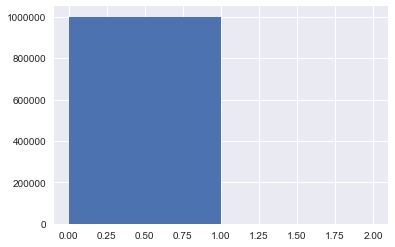

In [59]:
random_df.unicorns_found_randomly.hist(bins=[0,1,2])

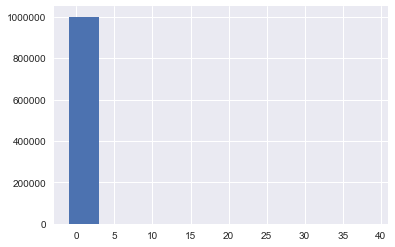

In [55]:
random_df.return_multiplier.hist()

In [56]:
random_df[random_df.unicorns_found_randomly>0].describe()

,unicorns_found_randomly,incubation_costs,unicorn_returns,return_multiplier
count,216.0,216.0,216.0,216.0
mean,1.0,250.0,10000.0,39.0
std,0.0,0.0,0.0,0.0
min,1.0,250.0,10000.0,39.0
25%,1.0,250.0,10000.0,39.0
50%,1.0,250.0,10000.0,39.0
75%,1.0,250.0,10000.0,39.0
max,1.0,250.0,10000.0,39.0


Best case scenario, sometimes one was found, yielding a success but the likelihood of this working out is on the order of 1 in 5 thousand.

Thats pretty damn bleak... It's a good thing that nobody is really betting randomly.

# Step 2: Narrowing the Field

Our fearless investment scientists all have their own ways to narrow the field. Datasets like Crunchbase, CBinsights, venture source, matterhorne, etc allow the list of potential unicorn particles to be reduced to a dramitically smaller subset. Now we examine what happens if our scientists instead randomly incubate potential unicorn particles from this subset, with a spray and pray approach, hoping the huge wins of finding a unicorn will offset the losses associated with the rarity of those particles

In [60]:
curated_base_rate = .01

In [61]:
N = 1000000 #experiments
K = 25 #particles incubated

#Python purists beware:
#I'm using loops here for expository purposes
unicorns_found_curated = np.zeros((N,))
for n in range(N):
    is_unicorn = np.zeros((K,)) #initialized as zero but changed to 1 based on outcome
    for i in range(K):
        #checkout come based on coin random outcome accordint to base rate
        is_unicorn[i] = int(np.random.random()<curated_base_rate)
    
    unicorns_found_curated[n] = sum(is_unicorn)

In [62]:
#organize the data
curated_df = pd.DataFrame()
curated_df['unicorns_found_curated']=unicorns_found_curated
curated_df['incubation_costs'] = incubation_cost*K
curated_df['unicorn_returns'] = unicorns_found_curated*unicorn_value
curated_df['return_multiplier'] = (curated_df.unicorn_returns-curated_df.incubation_costs )/(curated_df.incubation_costs)

In [63]:
curated_df.describe()

,unicorns_found_curated,incubation_costs,unicorn_returns,return_multiplier
count,1000000.000000,1000000.0,1000000.000000,1000000.000000
mean,0.249192,250.0,2491.920000,8.967680
std,0.496964,0.0,4969.643791,19.878575
min,0.000000,250.0,0.000000,-1.000000
25%,0.000000,250.0,0.000000,-1.000000
50%,0.000000,250.0,0.000000,-1.000000
75%,0.000000,250.0,0.000000,-1.000000
max,5.000000,250.0,50000.000000,199.000000


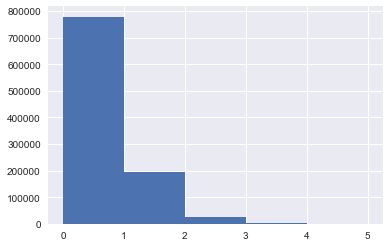

In [76]:
curated_df.unicorns_found_curated.hist(bins=range(6))

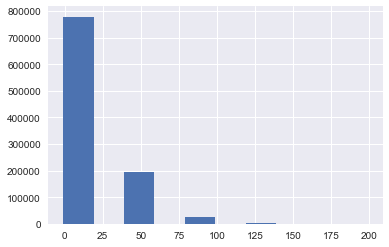

In [67]:
curated_df.return_multiplier.hist()

Now we are starting to get somewhere. By curating down to a set of particles with higher base rates the startegy of spreading the love is starting to pan out. 

However, we're still very beholden luck at this point because for all the real potential upside, we still are left with abject failure 80% of the time. Fair from the repeatable outcomes required to declare scientific discovery

# Step 3: The investment Scientist's Laboratory Equipment

The author of this article is the chief scientist at 50X ventures so we'll quickly outline the instruments in our lab

1. The HighEV Model -- special microscope for examining particles for evidence of the innate massive value creation that defines them. An adept investment scientist uses the HighEV to look for ways this partical might unleash value on the world that may not be evident to the naked eye. 

2. The Team Screen -- high powered atomic scale that measures fundamental elements making up particle. This special scale allows our scientists to measure the latent potential in the particle but also can sense the balance of those forces to determine whether it will be harnessed productively

3. The Exponential Screen -- partical collision simulator, builds a model of our particle interacting with other particles and interacting with the incubator environment to come up with a projection of how those interactions might enable the particle to unleash its latent value. This instrument also helps us configure our incubator for the particle when we decide to commit to it.

4. The 2sided-ROI estimator -- traditional finacial economics computed fromt the bottom up using market size to create revenue estimates, top down approach based on comparable exits are compared against realistic cost basis assessments to project ROI should the bet pay off. (It's important in practice but i couldn't quite force it into the physics analogy)

Now we acknowledge that every investment science team searching for unicorn particles has their own lab equipment. Our team of scientists has worked long and hard to forge our laboratory equipment and we believe we have some of the best. Many others have versions of these apparatus. At 50X we believe seeking unicorn particles, like science should be a collaborative effort and we aim to learn from and share with other investment scientists.

As we continue, we will examine what happens when high quality instruments and scientific process is used to make investment science breakthroughs. We will suppose that the scientific process allows our scientists to make predictions within the curated pool that are right 10% of the time.

That sounds awful... how is this better?

It turns out that getting 1 in 10 right doesn't sound great, in an absolute sense. It is a phenomenal lift relative to the base rates.

In [72]:
science_rate = .1
lift_to_base = science_rate/base_rate
lift_to_curated = science_rate/curated_base_rate

print "Lift of Science Rate against base rate is "+str(science_rate/base_rate)+" times better"
print "Lift of Science Rate against curated rate is "+str(science_rate/curated_base_rate)+" times better"

Lift of Science Rate against base rate is 10000.0 times better
Lift of Science Rate against curated rate is 10.0 times better


In [73]:
N = 1000000 #experiments
K = 25 #particles incubated

#Python purists beware:
#I'm using loops here for expository purposes
unicorns_found_science = np.zeros((N,))
for n in range(N):
    is_unicorn = np.zeros((K,)) #initialized as zero but changed to 1 based on outcome
    for i in range(K):
        #checkout come based on coin random outcome accordint to base rate
        is_unicorn[i] = int(np.random.random()<science_rate)
    
    unicorns_found_science[n] = sum(is_unicorn)

In [84]:
#organize the data
science_df = pd.DataFrame()
science_df['unicorns_found_science']=unicorns_found_science
science_df['incubation_costs'] = incubation_cost*K
science_df['unicorn_returns'] = unicorns_found_science*unicorn_value
science_df['return_multiplier'] = (science_df.unicorn_returns-science_df.incubation_costs )/(science_df.incubation_costs)

In [85]:
science_df.describe()

,unicorns_found_science,incubation_costs,unicorn_returns,return_multiplier
count,1000000.000000,1000000.0,1000000.000000,1000000.00000
mean,2.500032,250.0,25000.320000,99.00128
std,1.499891,0.0,14998.907456,59.99563
min,0.000000,250.0,0.000000,-1.00000
25%,1.000000,250.0,10000.000000,39.00000
50%,2.000000,250.0,20000.000000,79.00000
75%,3.000000,250.0,30000.000000,119.00000
max,12.000000,250.0,120000.000000,479.00000


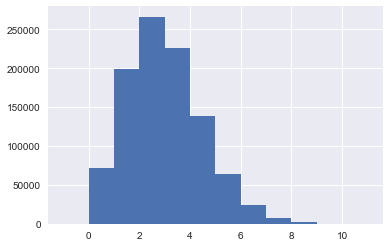

In [86]:
science_df.unicorns_found_science.hist(bins=range(-1,12,1))

Something really important just happened: we passed a tipping point in the underlying rate of success that makes abject failure fall dramatically. This is an important quality in detecting high value rare events... the goal isn't to be right all the time, the ability to get enough lift against the base probabilities that your now right often enough that playing the game as often as you can.. in this case 25 times, you regularly win and those winnings are valuable enough to offset the losses.

This value creation is a right tailed process, meaning the best investment scientists who find more unicorn particles themselves find massively more value and profit from bringing that value to the world

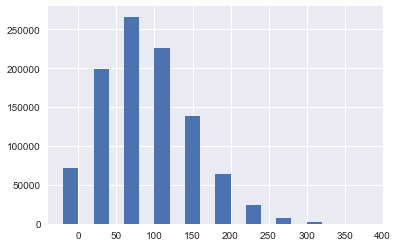

In [91]:
science_df.return_multiplier.hist(bins=range(-20,400,20))

Now thats a lot better right? We can get behind a business model where scientific principles are applied to systematically create lift in our estimates for the rare 'unicorn particle'. Our investment scientists are tireless building better curators to improve the quality of our search pool, studying the research of other investment scientist to build newer better instruments and applying running experiments using those instruments to determine which particles to incubate. 

All of this to unleash massive value into the world!